In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from connalysis.network import stats

In [2]:
stats_all={"all":{}, "maximal":{}}
connectomes=["BBP", "MICrONS","Celegans", "Drosophila" ]
props=["euclidean_edges_sc", "wasserstein_deg_total"]
for conn in connectomes:
    print(f"Analyzing {conn}")
    df_nbd=pd.read_pickle(f"../../data/props_{conn}_original.pkl")
    for stype in stats_all.keys():
        stats_all[stype][conn]={}
        if stype =="all":
            s_lists=pd.read_pickle(f"../../data/{conn}_list_simplices_by_dimension_.pkl")['original']
        elif stype =="maximal":
             s_lists=pd.read_pickle(f"../../data/{conn}_list_simplices_by_dimension_maximal.pkl")['original']
        for prop in props:
            vals=df_nbd[prop]
            stats_all[stype][conn][prop]=stats.node_stats_per_position(s_lists,vals,
                                                                       dims=s_lists.index.drop(0),with_multiplicity=True)

Analyzing BBP


100%|████████████████████████████████████████████████████████████████████████| 6/6 [00:21<00:00,  3.59s/it]


Analyzing MICrONS


100%|████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 17.12it/s]


Analyzing Celegans


100%|███████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 273.82it/s]


Analyzing Drosophila


100%|███████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 140.63it/s]


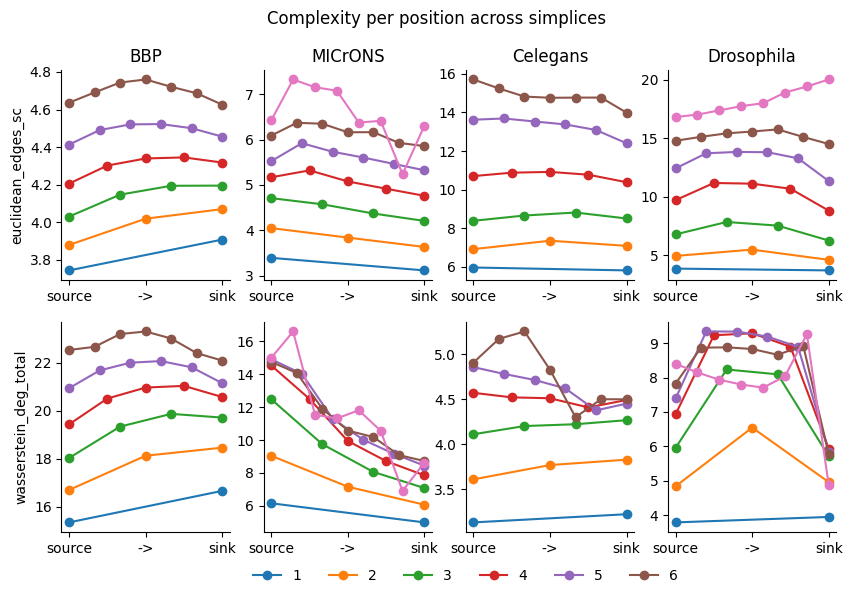

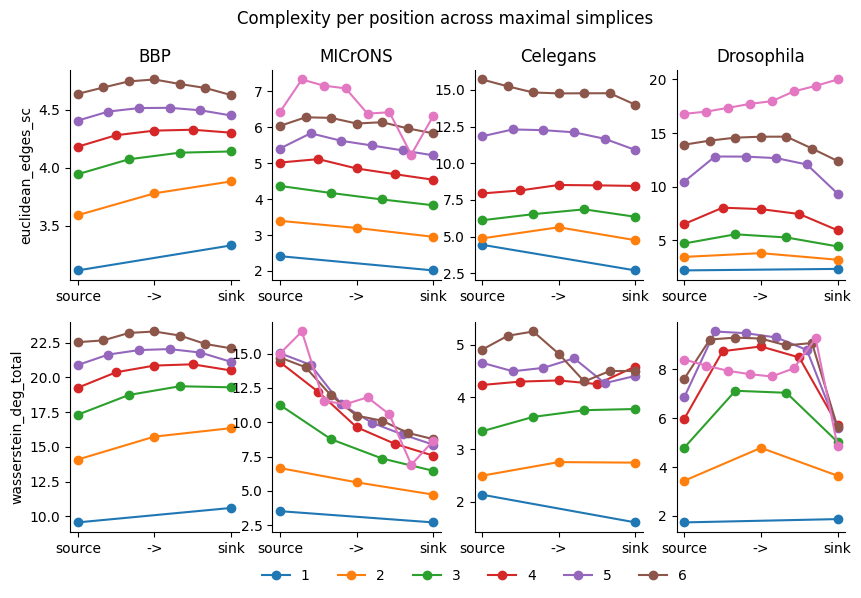

In [3]:
# Plotting effect of position 
fig, axs = plt.subplots(2,4, figsize=(10,6)) # For all simplices
fig2, axs2 = plt.subplots(2,4, figsize=(10,6)) # For maximal simplices

fig.suptitle("Complexity per position across simplices")
fig2.suptitle("Complexity per position across maximal simplices")
for i, prop in enumerate(props):
    axs[i,0].set_ylabel(f"{prop}")
    axs2[i,0].set_ylabel(f"{prop}")
    for j, conn in enumerate(connectomes):
        axs[0,j].set_title(f"{conn}")
        axs2[0,j].set_title(f"{conn}")
        for l, dim in enumerate(stats_all[stype][conn][prop].keys()):
            y=stats_all["all"][conn][prop][dim]["mean"][:-1].to_numpy()
            y_max=stats_all["maximal"][conn][prop][dim]["mean"][:-1].to_numpy()
            x=np.linspace(0,1,y.size)
            axs[i,j].plot(x,y,marker="o", label=f"{dim}", color=f"C{l}")
            axs2[i,j].plot(x,y_max,marker="o", label=f"{dim}", color=f"C{l}")
            # Formatting 
            axs[i,j].spines[["top", "right"]].set_visible(False)
            axs2[i,j].spines[["top", "right"]].set_visible(False)
            axs[i,j].set_xticks([0,0.5,1], ["source", "->", "sink"])
            axs2[i,j].set_xticks([0,0.5,1], ["source", "->", "sink"])
axs[1,2].legend(frameon=False,ncols=7,loc=8, bbox_to_anchor=(0,-0.3))
axs2[1,2].legend(frameon=False,ncols=7,loc=8, bbox_to_anchor=(0,-0.3))

fig.savefig(f"figs/complexity_position_{prop}.pdf", transparent=True, bbox_inches="tight")
fig2.savefig(f"figs/complexity_position_{prop}_maximal.pdf", transparent=True, bbox_inches="tight")

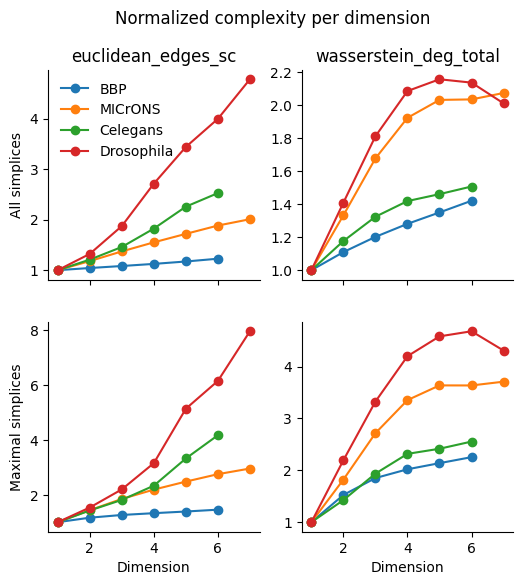

In [4]:
# Normalized curves across dimensions (irrespective of position)  
fig, axs = plt.subplots(2,2,figsize=(6,6),sharex='col')
fig.suptitle("Normalized complexity per dimension") 
for k, prop in enumerate(props):
    axs[0,k].set_title(prop)
    for l, conn in enumerate(connectomes):
        dims = stats_all["all"][conn][prop].keys()
        y=np.empty(0); err=np.empty(0)
        y_max=np.empty(0); err_max=np.empty(0)
        for dim in dims: 
            y=np.append(y, stats_all["all"][conn][prop][dim].loc["all", "mean"])
            err=np.append(err,stats_all["all"][conn][prop][dim].loc["all", "sem"])
            y_max=np.append(y_max, stats_all["maximal"][conn][prop][dim].loc["all", "mean"])
            err_max=np.append(err_max,stats_all["maximal"][conn][prop][dim].loc["all", "sem"])
        axs[0,k].plot(dims, y/y[0], marker="o", label=conn, color=f"C{l}")
        axs[1,k].plot(dims, y_max/y_max[0], marker="o", label=conn, color=f"C{l}", linestyle="solid")
        axs[-1,k].set_xlabel("Dimension") 
        axs[0,k].spines[["top", "right"]].set_visible(False)
        axs[1,k].spines[["top", "right"]].set_visible(False)
axs[0,0].legend(frameon=False)
axs[0,0].set_ylabel("All simplices")    
axs[1,0].set_ylabel("Maximal simplices")
fig.savefig(f"figs/complexity_dimension_normalized.pdf", transparent=True, bbox_inches="tight")

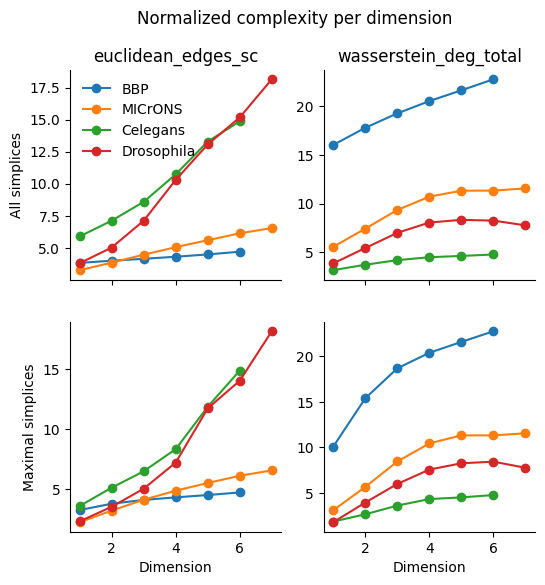

In [5]:
# Complexity curves across dimensions (irrespective of position)  
fig, axs = plt.subplots(2,2,figsize=(6,6),sharex='col')
fig.suptitle("Normalized complexity per dimension") 
for k, prop in enumerate(props):
    axs[0,k].set_title(prop)
    for l, conn in enumerate(connectomes):
        dims = stats_all["all"][conn][prop].keys()
        y=np.empty(0); err=np.empty(0)
        y_max=np.empty(0); err_max=np.empty(0)
        for dim in dims: 
            y=np.append(y, stats_all["all"][conn][prop][dim].loc["all", "mean"])
            err=np.append(err,stats_all["all"][conn][prop][dim].loc["all", "sem"])
            y_max=np.append(y_max, stats_all["maximal"][conn][prop][dim].loc["all", "mean"])
            err_max=np.append(err_max,stats_all["maximal"][conn][prop][dim].loc["all", "sem"])
        axs[0,k].plot(dims, y, marker="o", label=conn, color=f"C{l}")
        axs[1,k].plot(dims, y_max, marker="o", label=conn, color=f"C{l}", linestyle="solid")
        axs[-1,k].set_xlabel("Dimension") 
        axs[0,k].spines[["top", "right"]].set_visible(False)
        axs[1,k].spines[["top", "right"]].set_visible(False)
axs[0,0].legend(frameon=False)
axs[0,0].set_ylabel("All simplices")    
axs[1,0].set_ylabel("Maximal simplices")
fig.savefig(f"figs/complexity_dimension.pdf", transparent=True, bbox_inches="tight")